# Decision Tree for Regression

In [24]:
#Importing Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
#Loading the Dataset

dataset = pd.read_csv('winefile.csv')
print(dataset.info())
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
type                    6497 non-null object
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,white,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,white,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,white,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,white,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,white,6


In [26]:
#Dropping Wine Column as String Variable "Type"

dataset=dataset.drop('type', axis=1)
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [27]:
#Displaying Unique Quality Values in Dataset

dataset['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [28]:
#Describing Information About the Dataset

dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [29]:
#Dropping Target Variable from Dataset for Testing

X = dataset.drop(['quality'], axis=1)
y = dataset['quality']

# Training and Test Split

In [30]:
#Dividing Data into Training and Test Sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
#Using DecisionTreeRegressor Function

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [32]:
#Setting Predictions on the Test Set Using Predict Method

y_pred = regressor.predict(X_test)

# Actual Versus Predicted

In [33]:
#Viewing Results of .2 Test Data

dff=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
dff

,Actual,Predicted
5316,6,7.0
5210,6,5.0
3518,5,6.0
1622,6,4.0
2443,5,5.0
3521,7,6.0
5211,5,5.0
4936,4,5.0
1161,6,6.0
5993,5,5.0


In [62]:
#Selecting 20 random rows 

randomdff = dff.sample(n = 20)
len(randomdff)

20

In [63]:
#Finding Difference between Predicated - Actual = Difference Column

randomdff['Difference'] = randomdff['Predicted']-randomdff['Actual']
#randomdff.reset_index()
randomdff

,Actual,Predicted,Difference
2829,5,6.0,1.0
6175,6,5.0,-1.0
2626,7,6.0,-1.0
6247,5,6.0,1.0
4395,5,5.0,0.0
2705,6,5.0,-1.0
559,6,6.0,0.0
124,6,6.0,0.0
1014,5,8.0,3.0
1096,6,6.0,0.0


In [64]:
#Eliminating Decimal Places from Difference Values

#randomdff.options.display.float_format = '{:,.0f}'.format
#randomdff
randomdff['Difference']=randomdff['Difference'].round().astype(int)
randomdff

,Actual,Predicted,Difference
2829,5,6.0,1
6175,6,5.0,-1
2626,7,6.0,-1
6247,5,6.0,1
4395,5,5.0,0
2705,6,5.0,-1
559,6,6.0,0
124,6,6.0,0
1014,5,8.0,3
1096,6,6.0,0


In [65]:
#Displaying Unique Values in Random Difference List

Differencelist = randomdff['Difference'].tolist()
Differencelist

[1, -1, -1, 1, 0, -1, 0, 0, 3, 0, 0, 1, 0, 0, 0, -2, 0, -1, 0, 1]

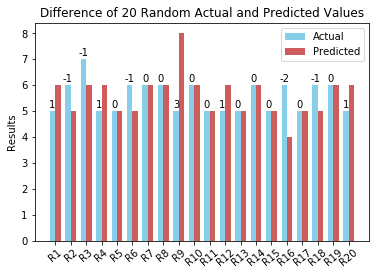

In [66]:
#Plotting Chart of 20 Random Actual an Predicted Values

ind = np.arange(len(randomdff))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
#rects1 = ax.bar(ind - width/2, men_means, width, yerr=men_std,
#                color='SkyBlue', label='Men')
rects1 = ax.bar(ind - width/2, randomdff['Actual'], width,color='SkyBlue', label='Actual')
#rects2 = ax.bar(ind + width/2, women_means, width, yerr=women_std,
#                color='IndianRed', label='Women')
rects2 = ax.bar(ind + width/2, randomdff['Predicted'], width,color='IndianRed', label='Predicted')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Results')
ax.set_title('Difference of 20 Random Actual and Predicted Values')
ax.set_xticks(ind)
ax.set_xticklabels(('R1', 'R2', 'R3', 'R4', 'R5','R6', 'R7', 'R8', 'R9', 'R10','R11', 'R12', 'R13', 'R14', 'R15','R16', 'R17', 'R18', 'R19','R20'),rotation=40)
ax.legend()

def autolabel(rects1,Differencelist, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off
    i = 0
    for rect in rects1:
        height = rect.get_height()
        #difference = rects2 - rects1 
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(Differencelist[i]), ha=ha[xpos], va='bottom')#, horizontalalignment='center')#,verticalalignment='center')
        i = i+1

#rects1 = Actual
#rects2 = Predicted
autolabel(rects1,Differencelist, "center")
#autolabel(rects2, "right")
plt.show()


# Statistical Results

In [51]:
#Statistics from Prediction Results

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4776923076923077
Mean Squared Error: 0.6776923076923077
Root Mean Squared Error: 0.8232206919728802


# The Mean Absolute Error for our algorithm is .47, which is less than 10 percent of the mean of all the values in the 'quality' column. This means that our algorithm did a good job at predicting quality scores.